test


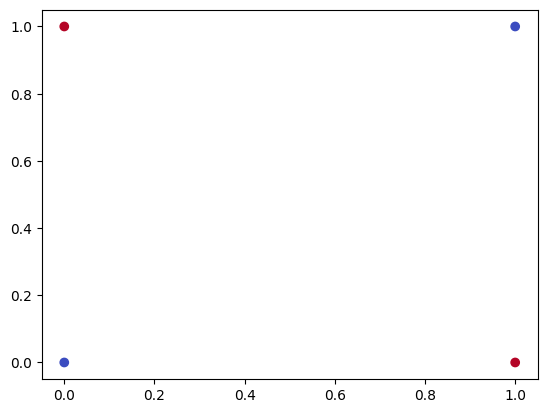

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Benchmark():
    def __init__(self,Nsc=1):
        self.Nsc = Nsc
        self.th_sc = np.array([0.1,0.1])
        
    def scdynamics(self,t,X,U,m1,w):
        rh = X[0]
        v = X[1]
        om = X[3]
        u1 = U[0]
        u2 = U[1]
        th1 = self.th_sc[0]
        th2 = self.th_sc[1]
        drhodv = v
        dvdt = rh*om**2-th1/rh**2+th2*u1+w
        dphdt = om
        domdt = -2*v*om/rh+th2*u2/rh+th2*m1/rh
        dXdt = np.array([drhodv,dvdt,dphdt,domdt])
        return dXdt
        
    def scdynamicsFDI(self,t,X,U,m1,w):
        x11 = X[0]
        x12 = X[1]
        x2 = X[2]
        x3 = X[3]
        u1 = U[0]
        u2 = U[1]
        th1 = self.th_sc[0]
        th2 = self.th_sc[1]
        dx11dt = x12/x2**2
        dx12dt = th2*x2*u2+th2*x2*m1
        dx2dt = x3
        dx3dt = x12**2/x2**3-th1/x2**2+th2*u1+w
        dXdt = np.array([dx11dt,dx12dt,dx2dt,dx3dt])
        return dXdt
    
    def scmeasurement(self,t,X):
        Y = np.array([X[0],X[2],X[3]])
        return Y
    
    def scmeasurementFDI(self,t,X):
        Y = np.array([X[0],X[1],X[2]])
        return Y
    
    def rk4(self,t,X,U):
        h = self.h
        k1 = self.dynamics(t,X,U)
        k2 = self.dynamics(t+h/2.,X+k1*h/2.,U)
        k3 = self.dynamics(t+h/2.,X+k2*h/2.,U)
        k4 = self.dynamics(t+h,X+k3*h,U)
        return t+h,X+h*(k1+2.*k2+2.*k3+k4)/6.
    
if __name__ == "__main__":
    Nsc = 1